In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import os
from IPython.display import display
from sklearn import svm


c:\Users\15403\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
path_train = 'C:\\Users\\15403\\Desktop\\fall semester 2023\\computer vision and machine learning\\study\\archive (2)\\marvel\\train'
path_test = 'C:\\Users\\15403\\Desktop\\fall semester 2023\\computer vision and machine learning\\study\\archive (2)\\marvel\\valid'

classes =['black widow', 'captain america','doctor strange','hulk','ironman','loki','spider-man','thanos']
classes

['black widow',
 'captain america',
 'doctor strange',
 'hulk',
 'ironman',
 'loki',
 'spider-man',
 'thanos']

In [ ]:
myclasses = classes
len(myclasses)

8

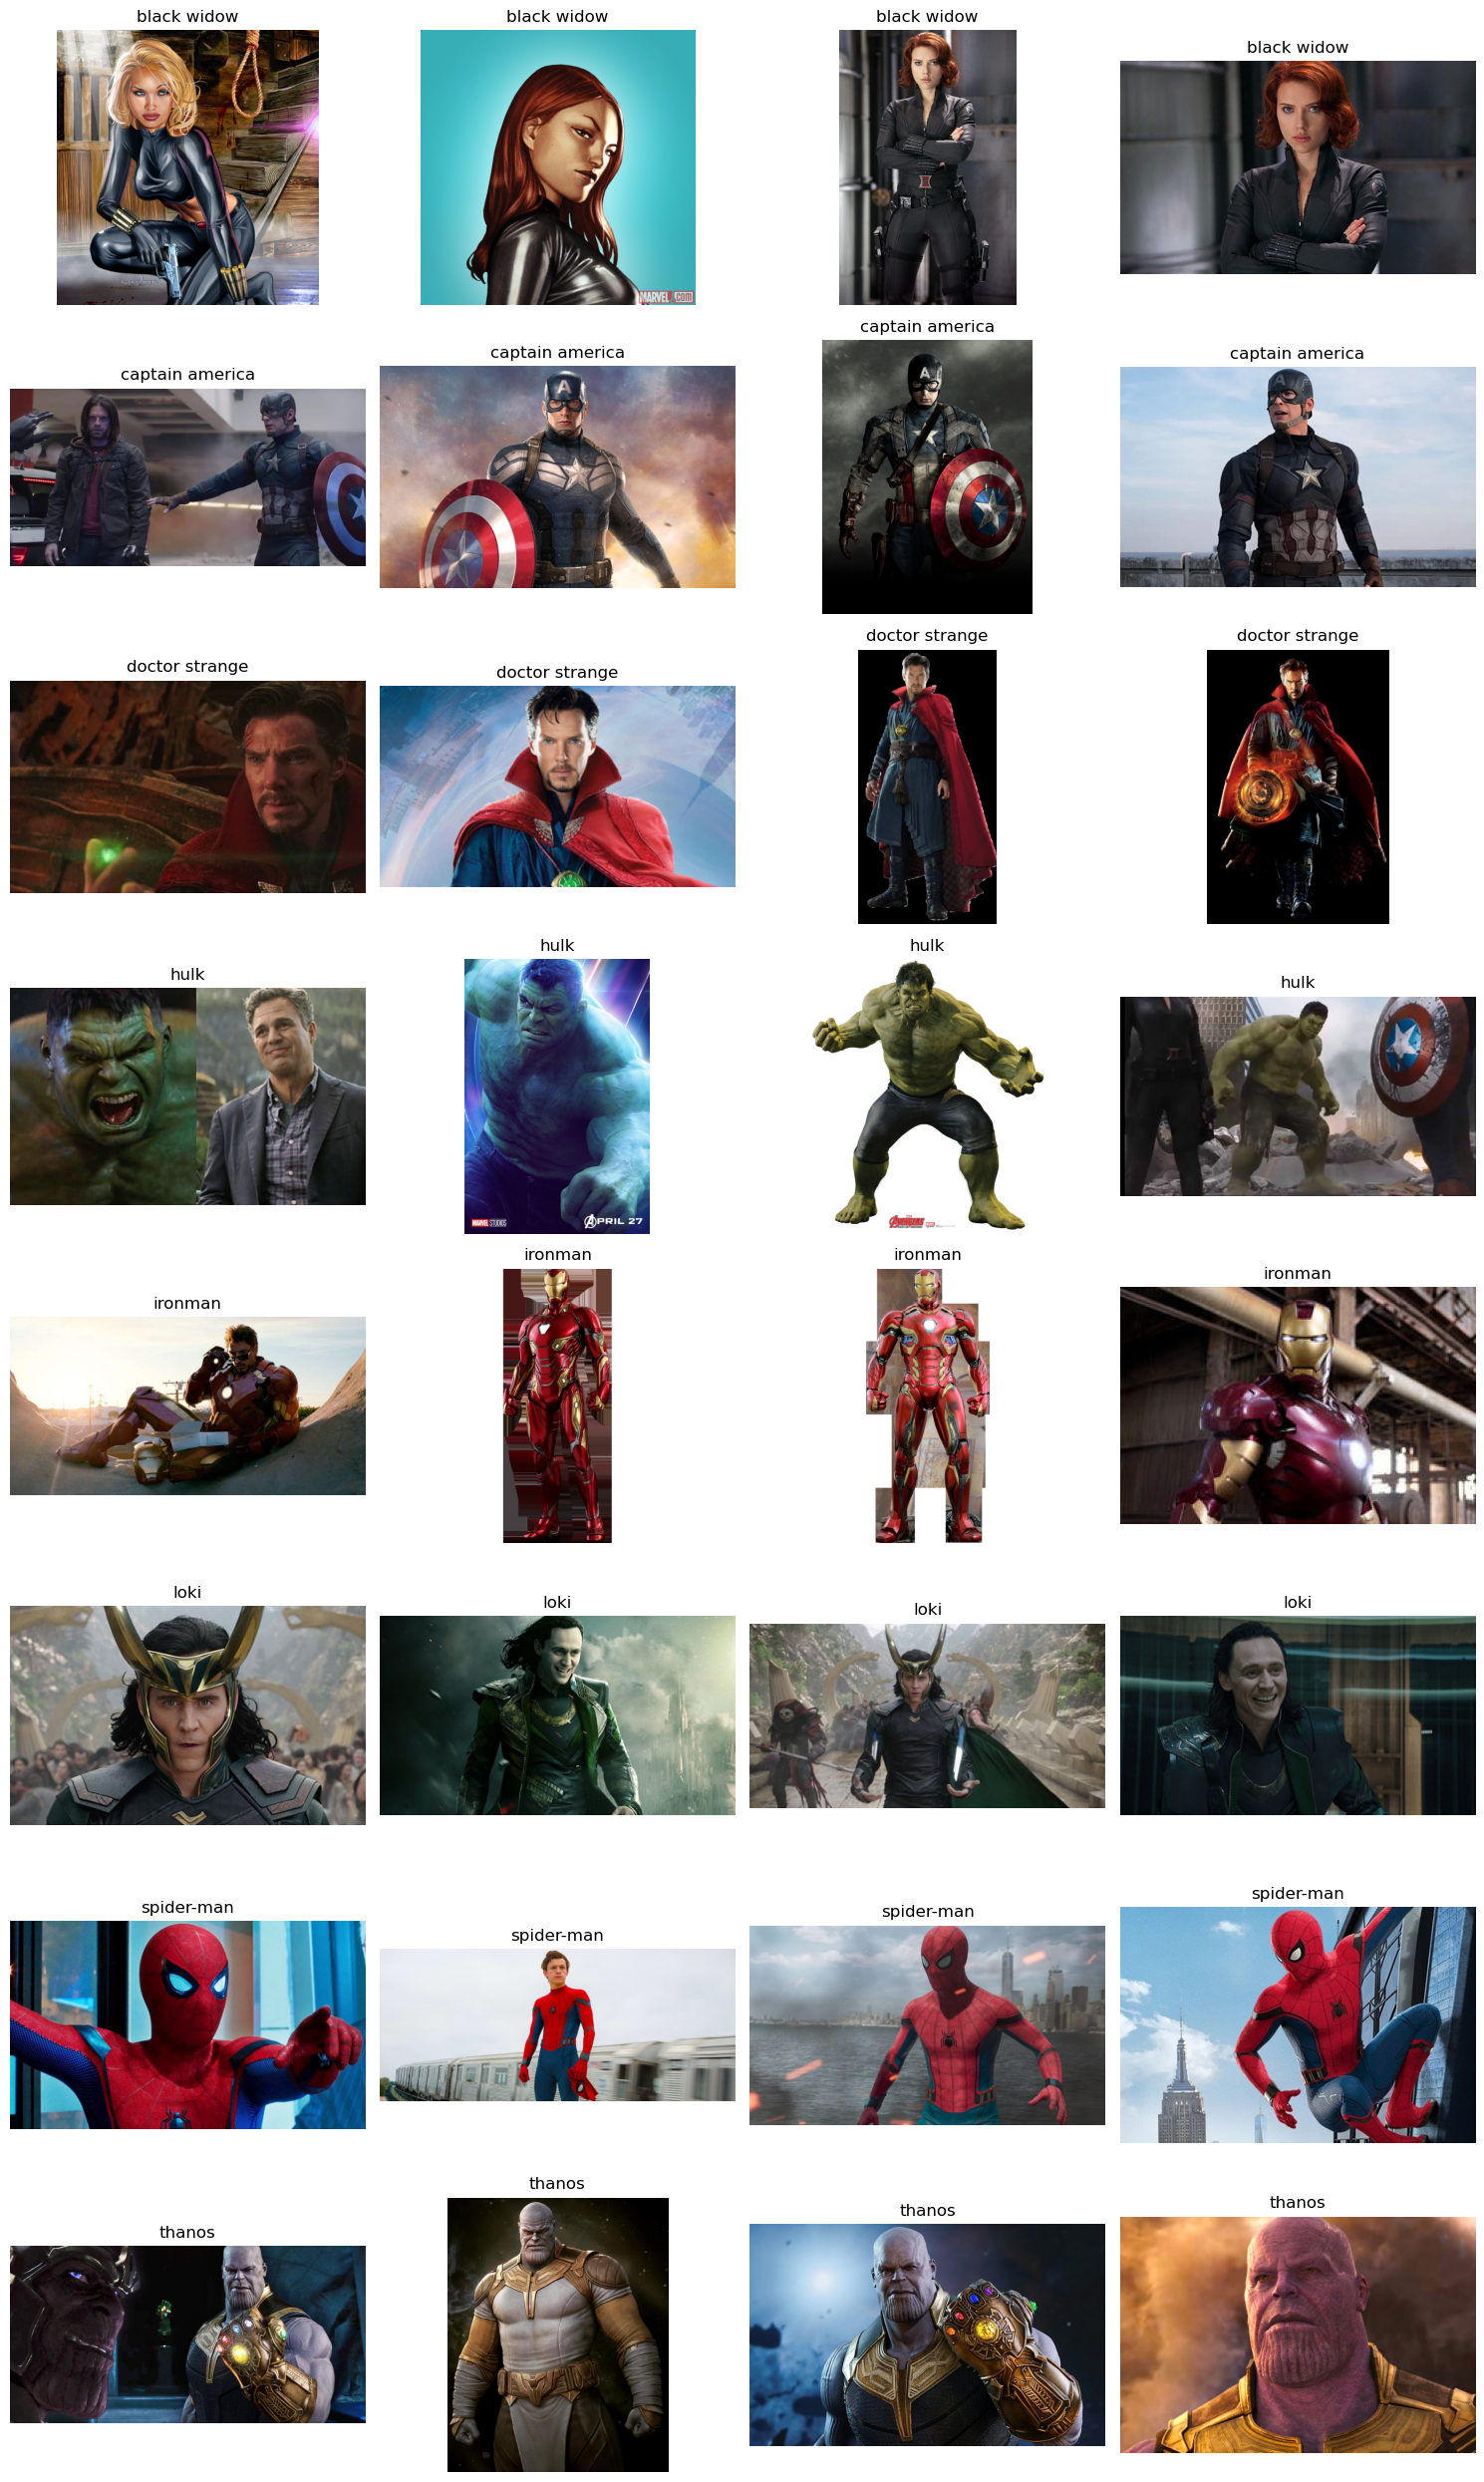

In [ ]:
def get_images_from_class(class_dir):
    # Get all jpg and png images from the directory
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png'))]
    return [Image.open(os.path.join(class_dir, img_file)) for img_file in image_files]

# Display the images
plt.figure(figsize=(15, 25))

# Iterate over classes and show some images from each class
for class_idx, class_name in enumerate(classes):
    images = get_images_from_class(os.path.join(path_train, class_name))
    
    # Just displaying up to 4 images per class for visualization purposes
    for img_idx, img in enumerate(images[:4]):
        plt.subplot(len(classes), 4, 4 * class_idx + img_idx + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
        
plt.tight_layout()
plt.show()

In [ ]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


def colorHistogram(image):
    #image = color.rgb2hsv(image)
    image = imNormalize(image)
    
    h1 = exposure.histogram(image[:,:,0])
    h2 = exposure.histogram(image[:,:,1])
    h3 = exposure.histogram(image[:,:,2])
    h = np.concatenate((h1[0],h2[0],h3[0]), axis = None)
    h = h / (image.shape[0]*image.shape[1])
    return h

In [ ]:
numtrain = 430

# Initialize arrays
traindata = []
testdata = []
trainlabels = []
testlabels = []


# Extract color histogram for train data
for classnum, class_name in enumerate(classes):
    folder_train = os.path.join(path_train, class_name)
    filelist_train = os.listdir(folder_train)
    for i, filename in enumerate(filelist_train[:numtrain]):  
        filepath = os.path.join(folder_train, filename)
        image = io.imread(filepath)
        image = transform.resize(image, [256, 256])
        histogram = colorHistogram(image)
        traindata.append(histogram)
        trainlabels.append(classnum)   # append the current class number as the label

        print(f'\rProcessing Train: {i+1}/{numtrain} of {class_name}', end='')

# Extract color histogram for test data
for classnum, class_name in enumerate(classes):
    folder_test = os.path.join(path_test, class_name)
    filelist_test = os.listdir(folder_test)
    for i, filename in enumerate(filelist_test[:numtrain]):  
        filepath = os.path.join(folder_test, filename)
        image = io.imread(filepath)
        image = transform.resize(image, [256, 256])
        histogram = colorHistogram(image)
        testdata.append(histogram)
        testlabels.append(classnum)    # append the current class number as the label
        print(f'\rProcessing Test: {i+1}/{numtrain} of {class_name}', end='')

traindata = np.array(traindata)
testdata = np.array(testdata)
trainlabels = np.array(trainlabels)
testlabels = np.array(testlabels)


print("\nTrain data shape:", traindata.shape)
print("Test data shape:", testdata.shape)
print("Train labels shape:", trainlabels.shape)
print("Test labels shape:", testlabels.shape)

Processing Test: 55/430 of thanos-manangeaea
Train data shape: (2586, 768)
Test data shape: (456, 768)
Train labels shape: (2586,)
Test labels shape: (456,)


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 1000, Accuracy: 0.19298245614035087


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 2000, Accuracy: 0.19517543859649122


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 3000, Accuracy: 0.19736842105263158


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 4000, Accuracy: 0.18421052631578946


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 5000, Accuracy: 0.19078947368421054

Highest Accuracy: 0.19736842105263158

Classification Report:
                  precision    recall  f1-score   support

    black widow       0.19      0.16      0.18        55
captain america       0.17      0.18      0.18        62
 doctor strange       0.16      0.18      0.17        61
           hulk       0.18      0.20      0.19        56
        ironman       0.18      0.16      0.17        56
           loki       0.17      0.17      0.17        54
     spider-man       0.26      0.30      0.28        57
         thanos       0.27      0.24      0.25        55

       accuracy                           0.20       456
      macro avg       0.20      0.20      0.20       456
   weighted avg       0.20      0.20      0.20       456



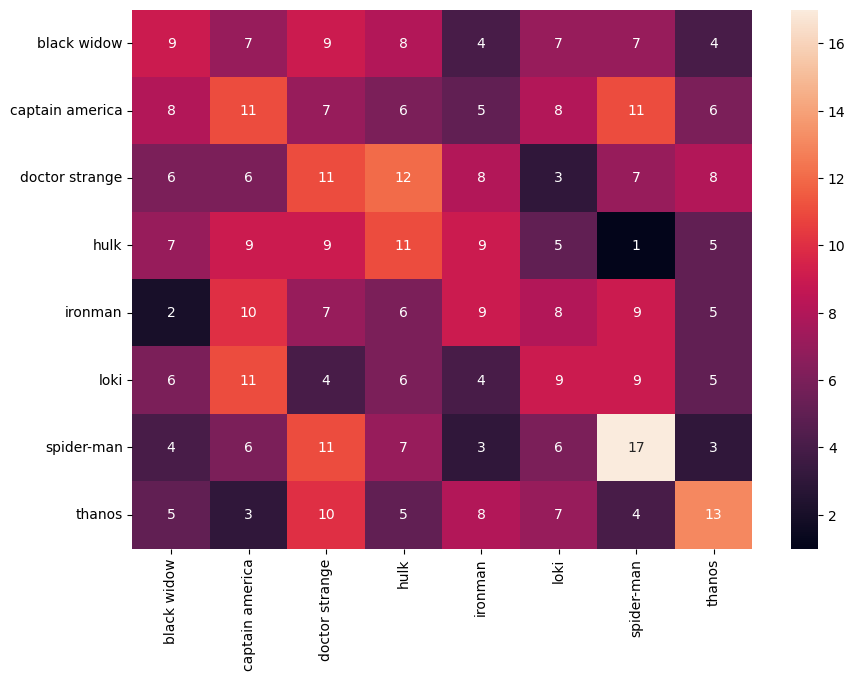

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

def train_and_predict_with_LinearSVC(traindata, trainlabels, testdata, max_iterations):
    # Feature Scaling
    scaler = StandardScaler()
    traindata = scaler.fit_transform(traindata)
    testdata = scaler.transform(testdata)

    # Initialize the LinearSVC model with the given max_iterations
    model = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                      C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                      class_weight=None, verbose=0, random_state=None, max_iter=max_iterations)

    # Fit the model with training data
    model.fit(traindata, trainlabels)

    # Predict on the test data
    predicted_labels = model.predict(testdata)

    return predicted_labels

best_accuracy = 0
best_predicted_labels = None
for max_iterations in range(1000, 5100, 1000):
    predicted_labels = train_and_predict_with_LinearSVC(traindata, trainlabels, testdata, max_iterations)
    accuracy = accuracy_score(testlabels, predicted_labels)
    print(f"Max Iterations: {max_iterations}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_predicted_labels = predicted_labels

# Evaluate the best LinearSVC predictions
print("\nHighest Accuracy:", best_accuracy)
print("\nClassification Report:\n", classification_report(testlabels, best_predicted_labels, target_names=myclasses))

# Compute the confusion matrix for the best LinearSVC predictions
cm_best = confusion_matrix(testlabels, best_predicted_labels)

# Visualize the confusion matrix
df_cm = pd.DataFrame(cm_best, index = [i for i in myclasses], columns = [i for i in myclasses])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.show()


In [ ]:
print('Classification accuracy =',np.average(np.diag(cm_best)))

Classification accuracy = 11.25


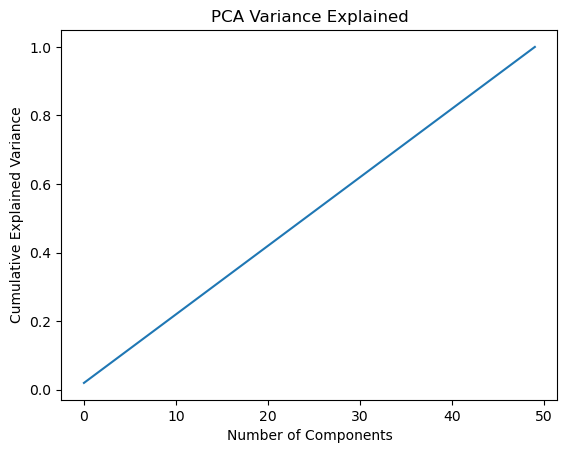

c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 1000, Accuracy: 0.21052631578947367


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 2000, Accuracy: 0.20175438596491227


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 3000, Accuracy: 0.21052631578947367


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 4000, Accuracy: 0.21052631578947367


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 5000, Accuracy: 0.20614035087719298

Highest Accuracy after PCA: 0.21052631578947367

Classification Report after PCA:
                  precision    recall  f1-score   support

    black widow       0.19      0.24      0.21        55
captain america       0.20      0.11      0.14        62
 doctor strange       0.25      0.16      0.20        61
           hulk       0.18      0.30      0.23        56
        ironman       0.10      0.09      0.09        56
           loki       0.24      0.07      0.11        54
     spider-man       0.25      0.42      0.32        57
         thanos       0.27      0.29      0.28        55

       accuracy                           0.21       456
      macro avg       0.21      0.21      0.20       456
   weighted avg       0.21      0.21      0.20       456



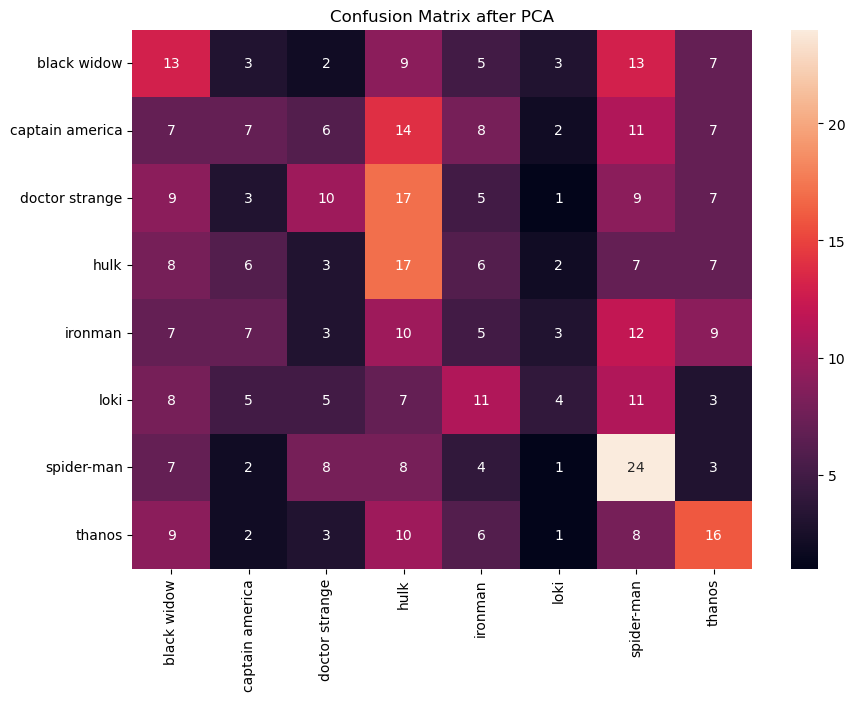

In [ ]:
scaler = StandardScaler()
traindata = scaler.fit_transform(traindata)
testdata = scaler.transform(testdata)

# Initialize the PCA object with the desired number of components
pca = PCA(n_components=50, whiten=True)

# Fit PCA on training data
lowtrain = pca.fit_transform(traindata)

# Transform the test data using the already fitted PCA object
lowtest = pca.transform(testdata)

# Checking variance explained by each component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.show()

# Decision on number of components can be made based on the above plot
# For now, proceeding with the already decided number of components

# Update traindata and testdata with their reduced-dimensionality versions
traindata = lowtrain
testdata = lowtest
best_accuracy = 0
best_predicted_labels = None
for max_iterations in range(1000, 5100, 1000):
    predicted_labels = train_and_predict_with_LinearSVC(traindata, trainlabels, testdata, max_iterations)
    accuracy = accuracy_score(testlabels, predicted_labels)
    print(f"Max Iterations: {max_iterations}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_predicted_labels = predicted_labels

# Evaluate the best LinearSVC predictions
print("\nHighest Accuracy after PCA:", best_accuracy)
print("\nClassification Report after PCA:\n", classification_report(testlabels, best_predicted_labels, target_names=myclasses))

# Compute the confusion matrix for the best LinearSVC predictions after PCA
cm_best = confusion_matrix(testlabels, best_predicted_labels)

# Visualize the confusion matrix
df_cm = pd.DataFrame(cm_best, index = [i for i in myclasses], columns = [i for i in myclasses])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix after PCA')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


# Initialize arrays
traindata = []
testdata = []
trainlabels = []
testlabels = []
allfiles = []

# Parameters
numtrain = 430  # Number of train samples per class
P = 8  # LBP parameter
R = 1  # LBP parameter

# Load data and extract features
for classnum in range(len(myclasses)):
    
    # Train data
    folder_train = os.path.join(path_train, myclasses[classnum])
    filelist_train = os.listdir(folder_train)
    for i in range(min(numtrain, len(filelist_train))):  # Ensures not to exceed available files
        filename = os.path.join(folder_train, filelist_train[i])
        allfiles.append(filename)
        image = io.imread(filename)
        if len(image.shape) > 2:
            image = color.rgb2gray(image)
        image = transform.resize(image, [256, 256])
        fd1 = feature.hog(image, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(1, 1), visualize=False)
        lbp_image = feature.local_binary_pattern(image, P, R, method='default')
        fd2 = exposure.histogram(lbp_image)[0]
        fd = np.concatenate((fd1, fd2), axis=None)
        traindata.append(fd)
        trainlabels.append(classnum)
        print(f'\rProcessing Train: {i+1}/{numtrain} of {myclasses[classnum]}', end='')
    
    # Test data
    folder_test = os.path.join(path_test, myclasses[classnum])
    print("Constructed test folder path:", folder_test)

    filelist_test = os.listdir(folder_test)
    for i in range(min(numtrain, len(filelist_test))):  # Limiting to numtrain for consistency, change as needed
        filename = os.path.join(folder_test, filelist_test[i])
        allfiles.append(filename)
        image = io.imread(filename)
        if len(image.shape) > 2:
            image = color.rgb2gray(image)
        image = transform.resize(image, [256, 256])
        fd1 = feature.hog(image, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(1, 1), visualize=False)
        lbp_image = feature.local_binary_pattern(image, P, R, method='default')
        fd2 = exposure.histogram(lbp_image)[0]
        fd = np.concatenate((fd1, fd2), axis=None)
        testdata.append(fd)
        testlabels.append(classnum)
        print(f'\rProcessing Test: {i+1}/{numtrain} of {myclasses[classnum]}', end='')

traindata = np.array(traindata)
testdata = np.array(testdata)
trainlabels = np.array(trainlabels)
testlabels = np.array(testlabels)

print("\nTrain data shape:", traindata.shape)
print("Test data shape:", testdata.shape)


Processing Train: 322/430 of black widowConstructed test folder path: C:\Users\15403\Desktop\fall semester 2023\computer vision and machine learning\study\archive (2)\marvel\valid\black widow
Processing Train: 324/430 of captain americaConstructed test folder path: C:\Users\15403\Desktop\fall semester 2023\computer vision and machine learning\study\archive (2)\marvel\valid\captain america
Processing Train: 345/430 of doctor strangeConstructed test folder path: C:\Users\15403\Desktop\fall semester 2023\computer vision and machine learning\study\archive (2)\marvel\valid\doctor strange
Processing Train: 321/430 of hulkConstructed test folder path: C:\Users\15403\Desktop\fall semester 2023\computer vision and machine learning\study\archive (2)\marvel\valid\hulk
Processing Train: 318/430 of ironmanConstructed test folder path: C:\Users\15403\Desktop\fall semester 2023\computer vision and machine learning\study\archive (2)\marvel\valid\ironman
Processing Train: 307/430 of lokiConstructed tes

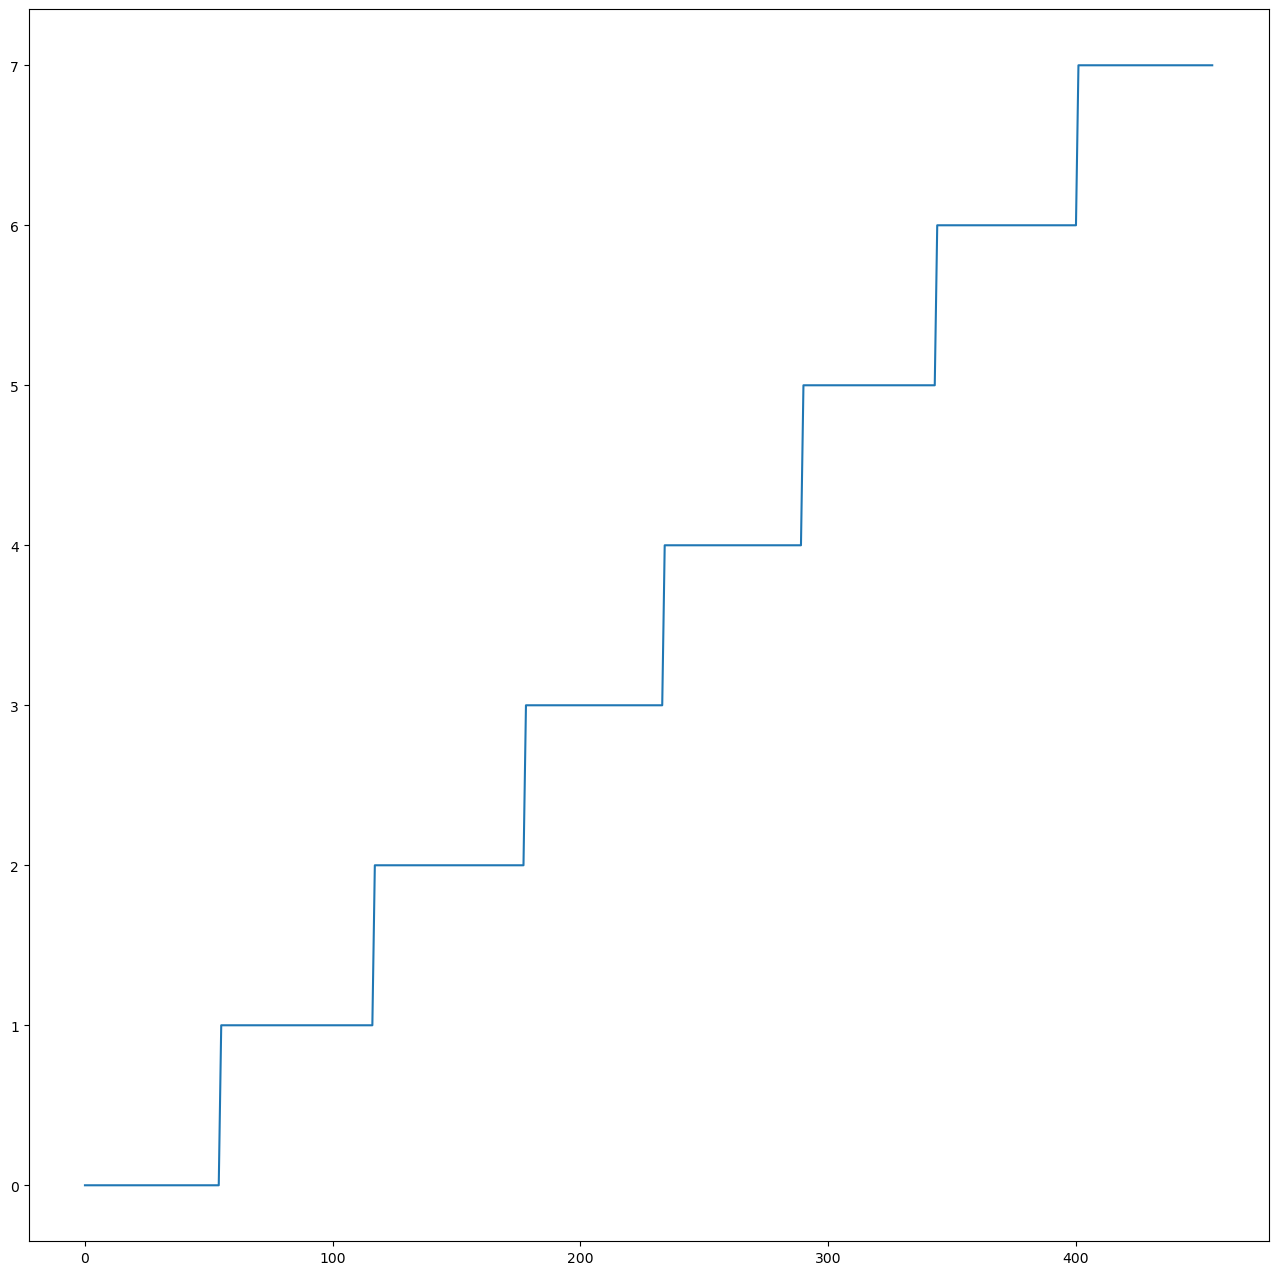

In [ ]:
fig = plt.figure(figsize=(16,16))
plt.plot(testlabels)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

def train_and_predict_with_LinearSVC(traindata, trainlabels, testdata, max_iterations):

    # Initialize the LinearSVC model with the given max_iterations
    model = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                      C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                      class_weight=None, verbose=0, random_state=None, max_iter=max_iterations)

    # Fit the model with training data
    model.fit(traindata, trainlabels)

    # Predict on the test data
    predicted_labels = model.predict(testdata)

    return predicted_labels

scaler = StandardScaler()
traindata = scaler.fit_transform(traindata)
testdata = scaler.transform(testdata)

best_accuracy = 0
best_predicted_labels = None
for max_iterations in range(1000, 5100, 1000):
    predicted_labels = train_and_predict_with_LinearSVC(traindata, trainlabels, testdata, max_iterations)
    accuracy = accuracy_score(testlabels, predicted_labels)
    print(f"Max Iterations: {max_iterations}, Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_predicted_labels = predicted_labels

# Evaluate the best LinearSVC predictions
print("\nHighest Accuracy:", best_accuracy)
print("\nClassification Report for Highest Accuracy:\n", classification_report(testlabels, best_predicted_labels, target_names=myclasses))


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 1000, Accuracy: 0.15789473684210525


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 2000, Accuracy: 0.16228070175438597


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 3000, Accuracy: 0.14692982456140352


c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Max Iterations: 4000, Accuracy: 0.15570175438596492
Max Iterations: 5000, Accuracy: 0.15350877192982457

Highest Accuracy: 0.16228070175438597

Classification Report for Highest Accuracy:
                  precision    recall  f1-score   support

    black widow       0.16      0.20      0.18        55
captain america       0.13      0.13      0.13        62
 doctor strange       0.19      0.16      0.18        61
           hulk       0.16      0.12      0.14        56
        ironman       0.17      0.20      0.18        56
           loki       0.08      0.09      0.09        54
     spider-man       0.24      0.26      0.25        57
         thanos       0.16      0.13      0.14        55

       accuracy                           0.16       456
      macro avg       0.16      0.16      0.16       456
   weighted avg       0.16      0.16      0.16       456



c:\Users\15403\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


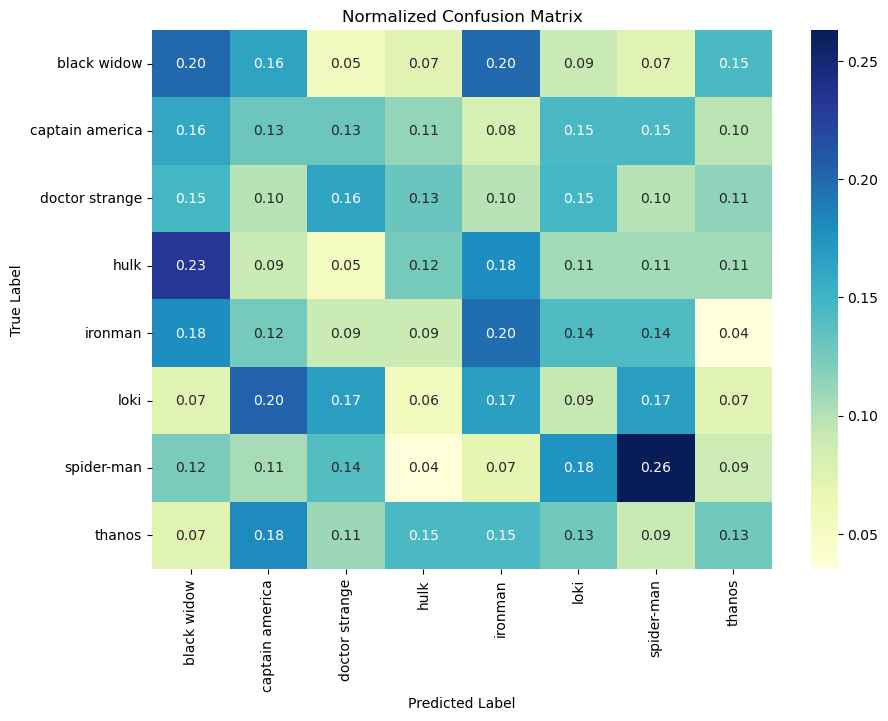

In [ ]:

# Getting the confusion matrix using sklearn's utility for the best_predicted_labels
conf = confusion_matrix(testlabels, best_predicted_labels)

# Normalizing the confusion matrix
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

# Construct a DataFrame from the normalized confusion matrix for better visualization
df_cm = pd.DataFrame(conf_normalized, index=[i for i in myclasses], columns=[i for i in myclasses])

# Visualization
plt.figure(figsize=(10, 7))  # Adjust the size as per your need
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt=".2f")  # Using a blue color map and formatting as float
plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
print('Classification accuracy =',np.average(np.diag(conf)))

Classification accuracy = 9.25
